<a href="https://colab.research.google.com/github/erisa03/computer-vision/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, segmentation, measure, data
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from skimage.segmentation import mark_boundaries
from skimage.draw import rectangle
from skimage.transform import resize
def show_images(images, titles, cols=2, cmap='gray'):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(12, 4 * rows))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

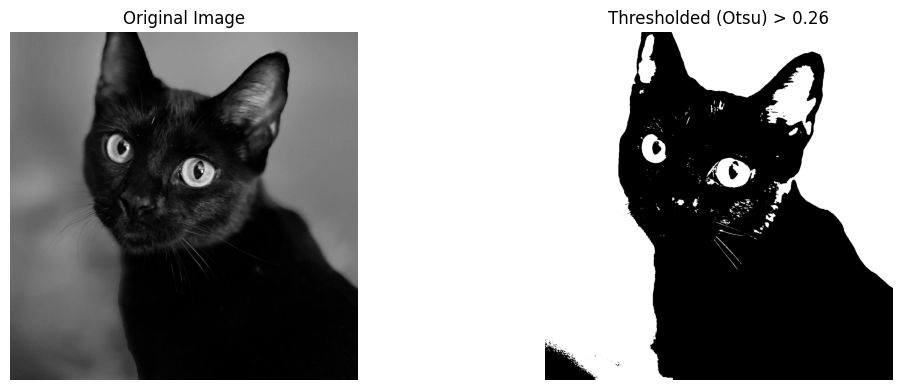


Task 1 Analysis: Otsu thresholding automatically selected a threshold value.

It segments the image into two regions: foreground and background.
While simple and fast, it may not work well with images with complex textures or lighting conditions.


In [13]:
from google.colab import drive

image = io.imread('/content/drive/MyDrive/computer-vision/cats.jpg', as_gray=True)

# Cell 3: Task 1 - Thresholding
thresh = filters.threshold_otsu(image)
binary = image > thresh
show_images([image, binary], ["Original Image", f"Thresholded (Otsu) > {thresh:.2f}"])
print("\nTask 1 Analysis: Otsu thresholding automatically selected a threshold value.\n")
print("It segments the image into two regions: foreground and background.")
print("While simple and fast, it may not work well with images with complex textures or lighting conditions.")

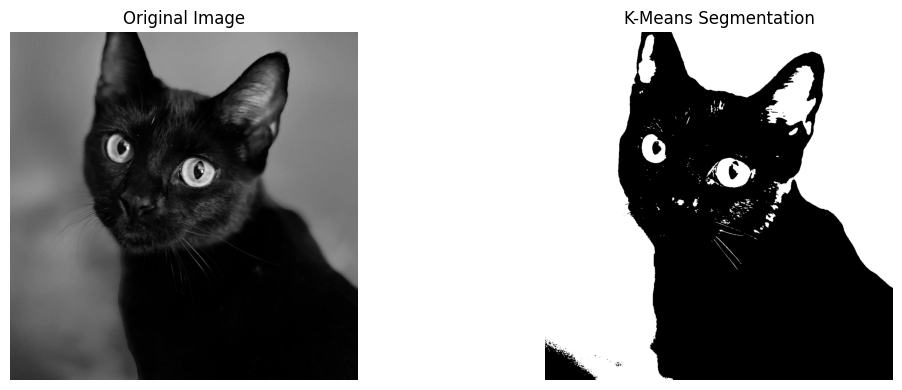


Task 2 Evaluation: K-Means clustering segments the image based on color similarity.
However, it does not consider spatial relationships, which may result in noisy segmentation.


In [14]:
from skimage import io, color, filters, segmentation, measure
from sklearn.cluster import KMeans

image_rgb = color.gray2rgb(image)
rows, cols, bands = image_rgb.shape
flat_image = image_rgb.reshape((-1, 3))
kmeans = KMeans(n_clusters=2, random_state=42).fit(flat_image)
seg_kmeans = kmeans.labels_.reshape(rows, cols)
show_images([image, seg_kmeans], ["Original Image", "K-Means Segmentation"])
print("\nTask 2 Evaluation: K-Means clustering segments the image based on color similarity.")
print("However, it does not consider spatial relationships, which may result in noisy segmentation.")

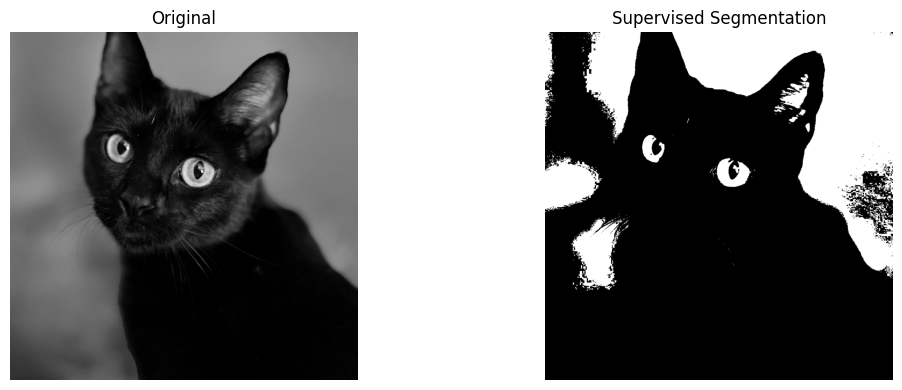


Task 3 Discussion: Supervised segmentation requires ground-truth labels for training.
It tends to be more accurate but heavily depends on the quality and quantity of the labels.
Classifier used: Random Forest



In [16]:
# Create synthetic labels for demo purposes (foreground/background rectangles)
labels = np.zeros_like(image, dtype=int)
r1, r2 = rectangle(start=(30, 30), end=(80, 80))
r3, r4 = rectangle(start=(150, 150), end=(200, 200))
labels[r1, r2] = 1  # foreground
labels[r3, r4] = 2  # background

X = image.reshape(-1, 1)
y = labels.flatten()
mask = y > 0
X_train, X_test, y_train, y_test = train_test_split(X[mask], y[mask], test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X)
seg_supervised = y_pred.reshape(image.shape)

show_images([image, seg_supervised], ["Original", "Supervised Segmentation"])
print("\nTask 3 Discussion: Supervised segmentation requires ground-truth labels for training.")
print("It tends to be more accurate but heavily depends on the quality and quantity of the labels.")
print("Classifier used: Random Forest\n")

In [17]:
print("\nTask 4 Explanation:")
print("Supervised segmentation uses labeled data to train a model, making it more accurate but data-dependent.")
print("Unsupervised segmentation does not require labels but may lack precision.")
print("\nAdvantages:")
print("- Supervised: High accuracy, learns complex patterns.")
print("- Unsupervised: No need for annotations, faster to set up.")
print("\nDisadvantages:")
print("- Supervised: Needs labeled data, time-consuming.")
print("- Unsupervised: May segment poorly, no learning of high-level features.")

print("\nExample: In the tasks above, supervised segmentation with synthetic labels produced a more accurate region-based separation compared to K-Means.")



Task 4 Explanation:
Supervised segmentation uses labeled data to train a model, making it more accurate but data-dependent.
Unsupervised segmentation does not require labels but may lack precision.

Advantages:
- Supervised: High accuracy, learns complex patterns.
- Unsupervised: No need for annotations, faster to set up.

Disadvantages:
- Supervised: Needs labeled data, time-consuming.
- Unsupervised: May segment poorly, no learning of high-level features.

Example: In the tasks above, supervised segmentation with synthetic labels produced a more accurate region-based separation compared to K-Means.


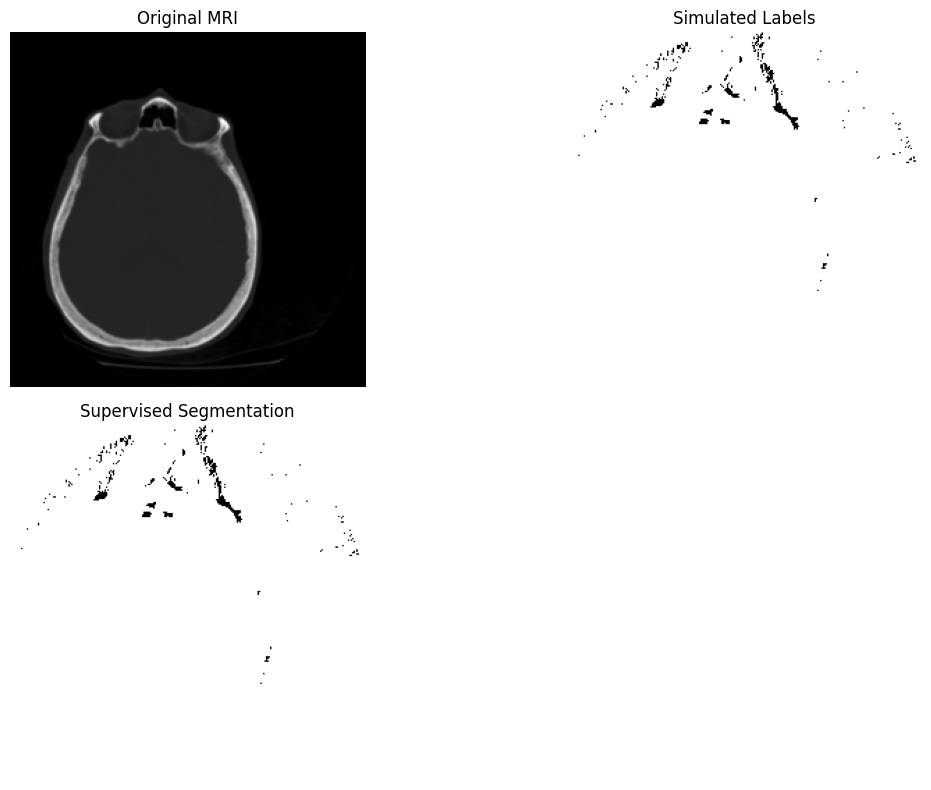


Task 3 Discussion: This example uses thresholded labels as a proxy for ground truth.
Supervised learning shows improvement over unsupervised by learning pixel-wise patterns.
In real scenarios, expert-annotated labels are needed for meaningful results.


In [33]:
# Load sample image (Medical MRI slice from scikit-image)
image_mri = data.brain()
gray_image = image_mri[0]
image_rgb = color.gray2rgb(gray_image)


# Task 3 Supervised Segmentation (Simulated Labels)
# Create a simple synthetic label by thresholding manually
labels = (gray_image > 0.5).astype(int)

image_2D = image_rgb.reshape((-1, 3))
labels_1D = labels.reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(
    image_2D, labels_1D, test_size=0.2, random_state=0
)

classifier = RandomForestClassifier(random_state=0).fit(X_train, y_train)
predicted_labels = classifier.predict(image_2D)
seg_supervised = predicted_labels.reshape(labels.shape)

show_images([gray_image, labels, seg_supervised], ["Original MRI", "Simulated Labels", "Supervised Segmentation"])
print("\nTask 3 Discussion: This example uses thresholded labels as a proxy for ground truth.")
print("Supervised learning shows improvement over unsupervised by learning pixel-wise patterns.")
print("In real scenarios, expert-annotated labels are needed for meaningful results.")
